In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping

In [2]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, category in enumerate(os.listdir(folder)):
        for filename in os.listdir(os.path.join(folder, category)):
            img = cv2.imread(os.path.join(folder, category, filename), cv2.IMREAD_GRAYSCALE) 
            if img is not None:
                img = cv2.resize(img, (64, 64)) 
                img = np.expand_dims(img, axis=-1)  # Add channel dimension
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

In [3]:
cur_path = os.getcwd()
path = os.path.join(cur_path,'devnagari')

In [4]:
# Path to your dataset folder
dataset_folder = path

# Load images and labels
images, labels = load_images_from_folder(dataset_folder)

# Split data into training and testing sets
X_train, X1, y_train, y1 = train_test_split(images, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X1, y1, test_size=0.4, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0


In [5]:
# Convert integer labels to binary matrix format
y_train_binary = to_categorical(y_train)
y_test_binary = to_categorical(y_test)

# Define the CNN model
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dense(58, activation='softmax')  # Change the output layer activation according to the number of classes
# ]) gives 82% accuracy
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)),  
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),  
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),  
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),  
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),  
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(58, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Train the model
r=model.fit(X_train, y_train_binary, epochs=30, batch_size=32, validation_data=(X_test, y_test_binary), callbacks=[early_stopping])

Epoch 1/30
283/283 [==============================] - 125s 434ms/step - loss: 3.0377 - accuracy: 0.2233 - val_loss: 1.3336 - val_accuracy: 0.6196
Epoch 2/30
283/283 [==============================] - 122s 433ms/step - loss: 0.7580 - accuracy: 0.7642 - val_loss: 0.5607 - val_accuracy: 0.8305
Epoch 3/30
283/283 [==============================] - 112s 395ms/step - loss: 0.3480 - accuracy: 0.8922 - val_loss: 0.4080 - val_accuracy: 0.8860
Epoch 4/30
283/283 [==============================] - 112s 394ms/step - loss: 0.1897 - accuracy: 0.9394 - val_loss: 0.3504 - val_accuracy: 0.8976
Epoch 5/30
283/283 [==============================] - 113s 399ms/step - loss: 0.1141 - accuracy: 0.9643 - val_loss: 0.3135 - val_accuracy: 0.9200
Epoch 6/30
283/283 [==============================] - 113s 400ms/step - loss: 0.0857 - accuracy: 0.9707 - val_loss: 0.3866 - val_accuracy: 0.9049
Epoch 7/30
283/283 [==============================] - 112s 396ms/step - loss: 0.0637 - accuracy: 0.9812 - val_loss: 0.4100 -

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

In [7]:
y_val_binary = to_categorical(y_test)

test_loss, test_accuracy = model.evaluate(X_test, y_test_binary)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

73/73 [==============================] - 6s 84ms/step - loss: 0.3135 - accuracy: 0.9200
Test Loss: 0.3134596049785614
Test Accuracy: 0.9199655652046204


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Use class indices directly
true_labels = y_test

# Generate classification report
report = classification_report(true_labels, predicted_labels)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print classification report
print("Classification Report:")
print(report)

# Print confusion matrix
print("\nConfusion Matrix:")
print(cm)

73/73 [==============================] - 6s 86ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       1.00      1.00      1.00        53
           2       0.98      0.96      0.97        56
           3       0.96      0.98      0.97        52
           4       0.97      1.00      0.98        58
           5       1.00      0.98      0.99        54
           6       0.91      0.98      0.95        53
           7       1.00      0.97      0.99        40
           8       0.95      0.98      0.96        54
           9       0.97      0.95      0.96        38
          10       0.79      0.86      0.82        51
          11       0.90      1.00      0.95        35
          12       0.96      0.96      0.96        47
          13       1.00      1.00      1.00        43
          14       1.00      1.00      1.00        34
          15       0.94      0.98      0.96        45
    

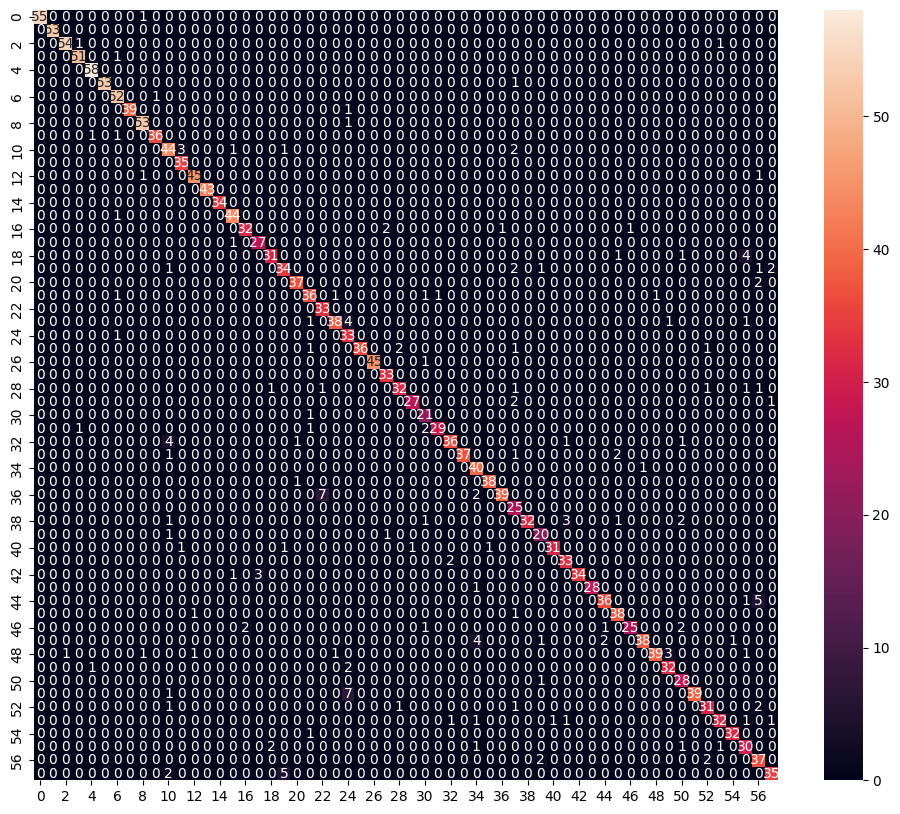

In [12]:
import seaborn as sns
# Create a subplot with a larger size
fig, ax = plt.subplots(figsize=(12, 10))

# Create the heatmap
sns.heatmap(cm, annot=True, ax=ax)

# Show the plot
plt.show()

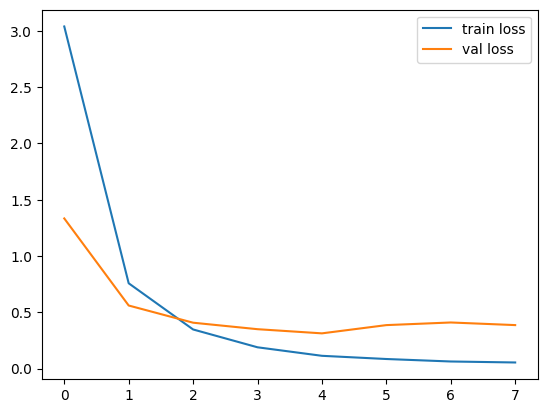

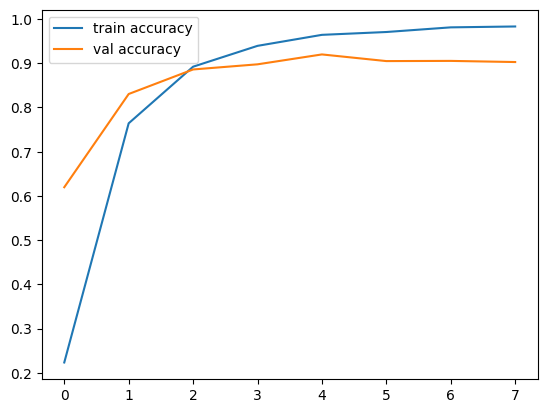

In [13]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

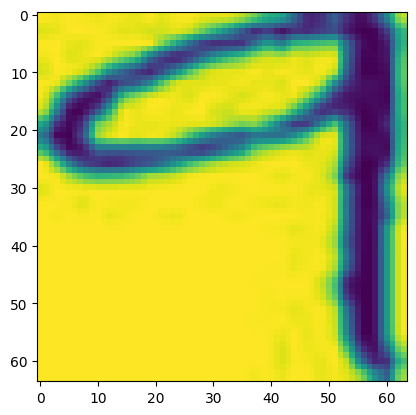

In [44]:
plt.imshow(X_test[7])

In [45]:
print(np.argmax(predictions[7]))

1


In [18]:
# Define the file path to save the model
model_path = os.path.join(cur_path, r'model.h5')

# Save the model
model.save(model_path)

print("Model saved successfully.")

Model saved successfully.


In [19]:
model.save("my_model.h5")